## Data Understanding


In [1]:
# importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import  LabelEncoder
# model Libraiess
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# metric library
from sklearn import metrics
# import datasets
from sklearn.datasets import load_breast_cancer

#warnings
import warnings 
warnings.filterwarnings("ignore")
import os

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
cancer_data=load_breast_cancer()

In [3]:
type(cancer_data)

sklearn.utils.Bunch

In [4]:
# np.c_ is the numpy concatenate function
# which is used to concat cancer_data['data'] and cancer_data['target'] arrays 
# for pandas column argument: concat cancer_data['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Breast_Cancer']

cancer_df=pd.DataFrame(data=np.c_[cancer_data["data"],cancer_data["target"]],columns=list(cancer_data["feature_names"])+["target"])

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
cancer_df["target"]=cancer_df.target.astype("uint16")
#cancer_df.dtypes

In [6]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

here we no null values

### Data Preparation

In [7]:
X=cancer_df.drop("target",axis=1)
y=cancer_df.target

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [10]:
# Average occurence rate in test and train data
print(y_train.mean())
print(y_test.mean())

0.6331658291457286
0.6140350877192983


### Model Building

In [11]:
# Base estimator :Let a weak leaner with max_depth=2
shallow_tree=DecisionTreeClassifier(max_depth=2)

# fit the tree
shallow_tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_pred=shallow_tree.predict(X_test)

In [13]:
print("Accuarcy:",metrics.accuracy_score(y_pred,y_test))

Accuarcy: 0.9298245614035088


In [14]:
# Adaboost with the tree as base estimator and n_estimators(no. pf trees)
n_est=[]
ABC_scores=[]
for n_estimator in range(1,50,3):
    n_est.append(n_estimator)
    ABC=AdaBoostClassifier(base_estimator=shallow_tree,n_estimators=n_estimator)
    ABC.fit(X_train,y_train)
    y_pred=ABC.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    ABC_scores.append(score)
    


In [15]:
ABC_scores

[0.935672514619883,
 0.9298245614035088,
 0.9181286549707602,
 0.9298245614035088,
 0.9532163742690059,
 0.9473684210526315,
 0.9473684210526315,
 0.9415204678362573,
 0.9532163742690059,
 0.9473684210526315,
 0.9473684210526315,
 0.9590643274853801,
 0.9532163742690059,
 0.9473684210526315,
 0.9532163742690059,
 0.9590643274853801,
 0.9707602339181286]

In [16]:
n_est

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]

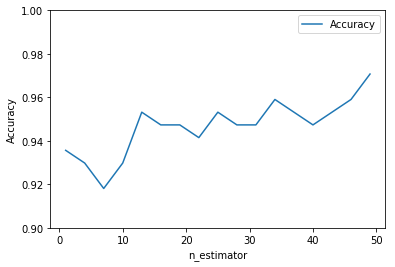

In [17]:
plt.figure()
plt.plot(n_est,ABC_scores,label="Accuracy")
plt.xlabel("n_estimator")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0.90,1)
plt.show()

In [18]:
max(ABC_scores)
    

0.9707602339181286